In [83]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [84]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
def yAxisCollision(slope: float, point: Point)->float:
    return point.y - slope * point.x

def toGradient(slope: float)->float:
    return math.tan(slope * math.pi / 180)

def getCollisionPoint(slope: float, vslope: float, y0: float)->Point:
    x = y0 / (slope - vslope)
    y = slope * x
    return Point(x, y)

def getMirroredPointDisToCenter(slope: float, point: Point)->float:
    slope = toGradient(slope)
    vslope = -1/slope
    y0 = yAxisCollision(vslope, point)
    vpoint = getCollisionPoint(slope, vslope, y0)
    return math.sqrt(vpoint.x * vpoint.x + vpoint.y * vpoint.y)

def fitLine(lst: list[Point])->float:
    slope = 0.1
    bestSlope = 0.0
    bestDisSum = -math.inf
    while slope <= 90:
        disSum = sum([getMirroredPointDisToCenter(slope, point) for point in lst])
        if disSum > bestDisSum:
            bestDisSum = disSum
            bestSlope = slope
        slope += 0.01
    return bestSlope

def optimize(lst: list[Point]):
    mx = math.inf
    my = math.inf
    for point in lst:
        mx = min(mx, point.x)
        my = min(my, point.y)
    for i in range(len(lst)):
        lst[i].x -= mx
        lst[i].y -= my

def plot(gradient: float, lst: list[Point]):
    xpoints = np.array([point.x for point in lst])
    ypoints = np.array([point.y for point in lst])

    x = np.linspace(-1, 11)
    y = math.tan(gradient * math.pi / 180)*x
    plt.plot(x, y, '-r')

    plt.scatter(xpoints, ypoints)
    plt.show()


degrees: 44.999999999999616


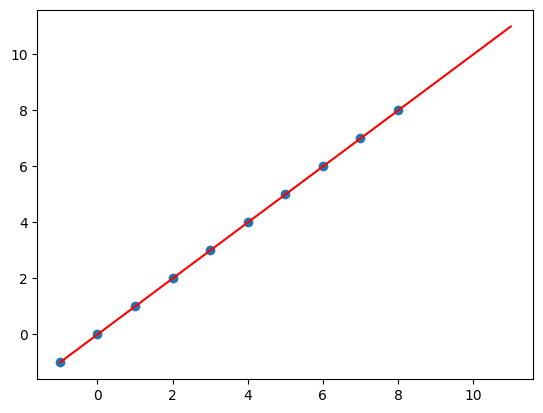

In [87]:
 
if __name__ == "__main__":
    lst = [Point(i, i) for i in range(1, 11)]
    optimize(lst)
    gradient = fitLine(lst)
    print('degrees:', gradient)
    plot(gradient, lst)
    